In [1]:
%load_ext autoreload
%autoreload 2
from convexlocalisometry.loss import isometry_loss, pseudoinverse_basis_pursuit_loss
from convexlocalisometry.transformations import exponential_transformation

In [2]:
import numpy as np
matrix = np.ones((1,1))
isometry_loss(matrix), np.log(pseudoinverse_basis_pursuit_loss(exponential_transformation(matrix)))

(0.0, 0.0)

In [5]:
import numpy as np
matrix = 2*np.identity(1)
isometry_loss(matrix), np.log(pseudoinverse_basis_pursuit_loss(exponential_transformation(matrix)))

(0.4804530139182014, 0.6931471805599453)

In [8]:
import numpy as np
matrix = np.identity(2)
isometry_loss(matrix), np.log(pseudoinverse_basis_pursuit_loss(exponential_transformation(matrix)))

(0.0, 0.6931471805599453)

In [12]:
import numpy as np
matrix = 2*np.identity(1)
isometry_loss(matrix), pseudoinverse_log_basis_pursuit_loss(exponential_transformation(matrix))

(0.4804530139182014, 0.4804530139182014)

In [31]:
import numpy as np
matrix = np.identity(2)
isometry_loss(matrix), pseudoinverse_log_basis_pursuit_loss(exponential_transformation(matrix))

(0.0, 0.0)

In [32]:
import numpy as np
matrix = np.identity(2)
matrix[0,0] = 2
isometry_loss(matrix), pseudoinverse_log_basis_pursuit_loss(exponential_transformation(matrix))

(0.4804530139182014, 0.4804530139182014)

In [41]:
import numpy as np
matrix = np.identity(2)
matrix[0,1] = .5

isometry_loss(matrix), pseudoinverse_log_basis_pursuit_loss(exponential_transformation(matrix))

(0.12247929918144643, 0.05132549546655068)

In [52]:
np.linalg.norm(np.linalg.inv(matrix) , axis = 1)

array([1.11803399, 1.        ])

In [62]:
transformed_matrix = exponential_transformation(matrix)
print(transformed_matrix)
inverted_transformed_matrix = np.linalg.inv(transformed_matrix)
print(inverted_transformed_matrix)
print(inverted_transformed_matrix @ transformed_matrix)
np.linalg.norm(np.linalg.inv(exponential_transformation(matrix)) , axis = 1)

[[1.  0.4]
 [0.  0.8]]
[[ 1.   -0.5 ]
 [ 0.    1.25]]
[[1.0000000e+00 4.4408921e-17]
 [0.0000000e+00 1.0000000e+00]]


array([1.11803399, 1.25      ])

In [64]:
.6**2 + .8**2

1.0

In [68]:
matrix = np.asarray([[1,.6],[0,.8]]) # singular values are less than for unitary

In [69]:
np.linalg.inv(matrix)

array([[ 1.  , -0.75],
       [ 0.  ,  1.25]])

In [72]:
exponential_transformation(matrix)

array([[1. , 0.6],
       [0. , 0.8]])

In [71]:
np.linalg.inv(exponential_transformation(matrix))

array([[ 1.  , -0.75],
       [ 0.  ,  1.25]])

In [ ]:
# how can any matrix have different row norms than singular values?
# clear answer: correlations
# but an inverse matrix should need bigger amounts to deal with correlations
# why would the sum of the log of the singular values
# be the same as sum of the singular values of the exponential normalized columns



In [63]:
help(np.linalg.inv)

Help on function inv in module numpy.linalg:

inv(a)
    Compute the (multiplicative) inverse of a matrix.
    
    Given a square matrix `a`, return the matrix `ainv` satisfying
    ``dot(a, ainv) = dot(ainv, a) = eye(a.shape[0])``.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Matrix to be inverted.
    
    Returns
    -------
    ainv : (..., M, M) ndarray or matrix
        (Multiplicative) inverse of the matrix `a`.
    
    Raises
    ------
    LinAlgError
        If `a` is not square or inversion fails.
    
    See Also
    --------
    scipy.linalg.inv : Similar function in SciPy.
    
    Notes
    -----
    
    .. versionadded:: 1.8.0
    
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.
    
    Examples
    --------
    >>> from numpy.linalg import inv
    >>> a = np.array([[1., 2.], [3., 4.]])
    >>> ainv = inv(a)
    >>> np.allclose(np.dot(a, ainv), np.eye(2))
    True
    >>> np.allclose(np.dot(ainv, a), 

In [51]:
np.linalg.svd(matrix)[1]

array([1.28077641, 0.78077641])

In [ ]:
# we are computing a pseudoinverse that is optimal w.r.t. a different criteria

In [15]:
import numpy as np
np.random.seed(0)
matrix = np.random.multivariate_normal(np.zeros(2), np.identity(2),2)
isometry_loss(matrix), pseudoinverse_log_basis_pursuit_loss(exponential_transformation(matrix))

(1.0917045642893135, 1.4763675160908787)

In [18]:
import numpy as np
np.random.seed(0)
matrix = np.random.multivariate_normal(np.zeros(1), np.identity(1),1)
isometry_loss(matrix), pseudoinverse_log_basis_pursuit_loss(exponential_transformation(matrix))

(0.322185234924768, 0.322185234924768)

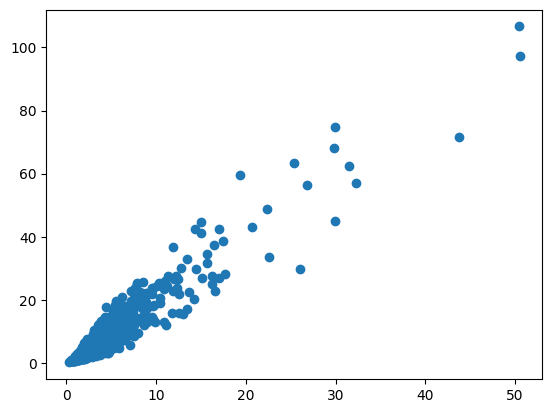

In [30]:
import numpy as np
np.random.seed(0)
isometry_losses = []
plbpl_losses = []
for i in range(1000):
    matrix = np.random.multivariate_normal(np.zeros(3), 2*np.identity(3),3)
    isometry_losses.append(isometry_loss(matrix))
    plbpl_losses.append(pseudoinverse_log_basis_pursuit_loss(exponential_transformation(matrix)))
    
import matplotlib.pyplot as plt
plt.scatter(isometry_losses, plbpl_losses)

In [6]:
# matrix = np.asarray([[1,0],[1,0]])
# isometry_loss(matrix), np.abs(np.log(pseudoinverse_basis_pursuit_loss(matrix))) # what of the case of not full rank?

In [13]:
pseudoinverse_basis_pursuit_loss(matrix)

0.7071067811865472

In [19]:
import numpy as np
matrix = 2*np.ones((2,2))
isometry_loss(matrix), np.abs(np.log(pseudoinverse_basis_pursuit_loss(matrix)))

/Users/samsonkoelle/convexlocalisometry/convexlocalisometry/loss.py:7: RuntimeWarning: divide by zero encountered in log
  output = np.linalg.norm(np.log(singular_values)) ** 2


(inf, 1.0397207708399183)

In [24]:
import numpy as np
matrix = np.identity(2)
isometry_loss(matrix), np.abs(np.log(pseudoinverse_basis_pursuit_loss(matrix)))

(0.0, 0.6931471805599453)

In [25]:
np.linalg.pinv(matrix)

array([[1., 0.],
       [0., 1.]])

In [26]:
pseudoinverse_basis_pursuit_loss(matrix) # perhaps we should take the log of the norms before the sum

2.0

In [11]:


def pseudoinverse_log_basis_pursuit_loss(X):  # beta_bp
    """Computes the basis pursuit loss of the matrix beta"""

    beta = np.linalg.pinv(
        X
    )  # do all inv have the same norm?  No... pinv is well defined tho
    output = np.linalg.norm(np.log(np.linalg.norm(beta, axis=1))**2)

    return output

In [36]:
pseudoinverse_log_basis_pursuit_loss(matrix), isometry_loss(matrix)

(0.0, 0.0)

In [ ]:
pseudoinverse_log_basis_pursuit_loss(matrix)**2, isometry_loss(matrix*2)

In [ ]:
# this part down here was an attempt to connect the isometry loss with the group lasso norm of the pseudoinverse

In [2]:
from pyLDLE2 import datasets


/Users/samsonkoelle/miniconda3/envs/isometry/lib/python3.10/site-packages/pyLDLE2/datasets.py:4: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.0)
  import scipy.integrate as integrate


In [3]:
X, labelsMat, ddX = datasets.Datasets().kleinbottle4d()

X.shape =  (10000, 4)


In [ ]:
# why even do the tangent space estimation
# compare the two!


# finish with flat torus
# and MD data

# simulate sparse matrix inversion from a dictionary
# create a unitary submatrix
# add Gaussian noise

matrix = simulate_unitary_matrix():
    

In [ ]:
# can construct an example that specifically fucks up the greedy algorithm

In [1]:
from convexlocalisometry.loss import isometry_loss, group_lasso_norm
from convexlocalisometry.transformations import exp_transform
import numpy as np
np.random.seed(0)
data = np.random.multivariate_normal(np.zeros(2), np.identity(2),2)

In [35]:
np.linalg.norm(np.log(np.linalg.svd(data)[1]))

1.0448466702293278

In [9]:
isometry_loss(data) # why different.  why abs versus norm?

1.0917045642893135

In [5]:
data_norm = exp_transform(data)

In [6]:
np.linalg.inv(data_norm)

array([[ 2.56078981, -0.45728128],
       [-1.42403231,  2.56663946]])

In [8]:
group_lasso_norm(np.linalg.inv(data_norm))

5.536516117383609

In [32]:
beta = np.linalg.inv(data_norm)
np.sum(np.abs(np.log(np.linalg.norm(beta, axis = 1))))

2.032792312187722

In [33]:
np.linalg.norm(np.log(np.linalg.norm(beta, axis = 1)))

1.4399358133375388

# norm of log singular values is not convex

/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_77170/3512844149.py:10: RuntimeWarning: invalid value encountered in log
  return np.abs(np.log(2 + t))


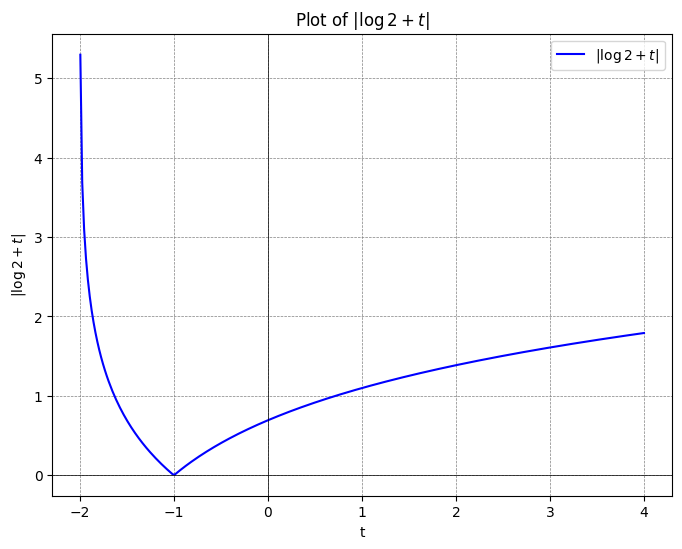

In [126]:
# here we have it stretching out from the matrix [[2]]
# this is still a great function with a special type of symmetry
# the "log" singular value function is going to be very hard to make convex
# can we use concave?
import numpy as np
import matplotlib.pyplot as plt

# Define the function g(t) = |log|2 + t||
def g(t):
    return np.abs(np.log(2 + t))

# Generate a range of t values
t_values = np.linspace(-4, 4, 400)
g_values = g(t_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(t_values, g_values, label=r'$|\log2 + t|$', color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title(r'Plot of $|\log2 + t|$')
plt.xlabel('t')
plt.ylabel(r'$|\log 2 + t|$')
plt.legend()
plt.show()


/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_77170/3939696586.py:10: RuntimeWarning: invalid value encountered in log
  return np.exp(np.abs(np.log(2 + t)))


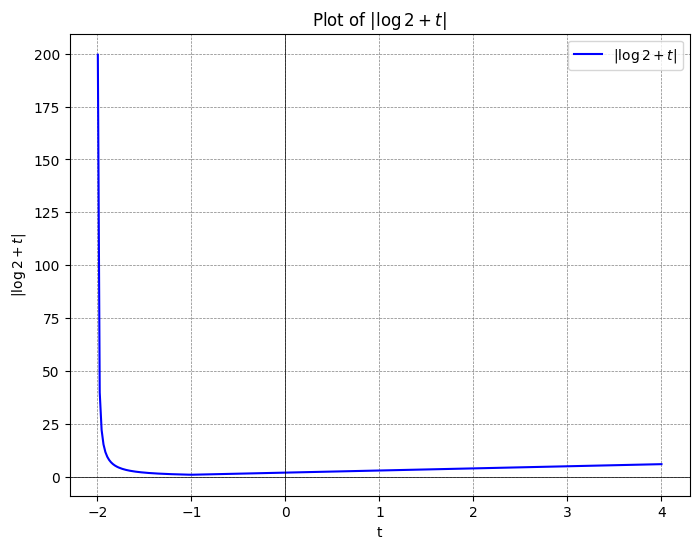

In [128]:
# here we have it stretching out from the matrix [[2]]
# this is still a great function with a special type of symmetry
# the "log" singular value function is going to be very hard to make convex
# can we use concave?
import numpy as np
import matplotlib.pyplot as plt

# Define the function g(t) = |log|2 + t||
def g(t):
    return np.exp(np.abs(np.log(2 + t)))

# Generate a range of t values
t_values = np.linspace(-4, 4, 400)
g_values = g(t_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(t_values, g_values, label=r'$|\log2 + t|$', color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title(r'Plot of $|\log2 + t|$')
plt.xlabel('t')
plt.ylabel(r'$|\log 2 + t|$')
plt.legend()
plt.show()


/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_95542/2786999758.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(t) + np.exp(1/t)


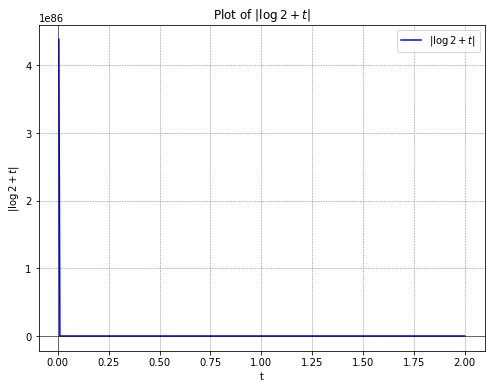

In [2]:
# here we have it stretching out from the matrix [[2]]
# this is still a great function with a special type of symmetry
# the "log" singular value function is going to be very hard to make convex
# can we use concave?
import numpy as np
import matplotlib.pyplot as plt

# Define the function g(t) = |log|2 + t||
def g(t):
    return np.exp(t) + np.exp(1/t)

# Generate a range of t values
t_values = np.linspace(0, 2, 400)
g_values = g(t_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(t_values, g_values, label=r'$|\log2 + t|$', color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title(r'Plot of $|\log2 + t|$')
plt.xlabel('t')
plt.ylabel(r'$|\log 2 + t|$')
plt.legend()
plt.show()


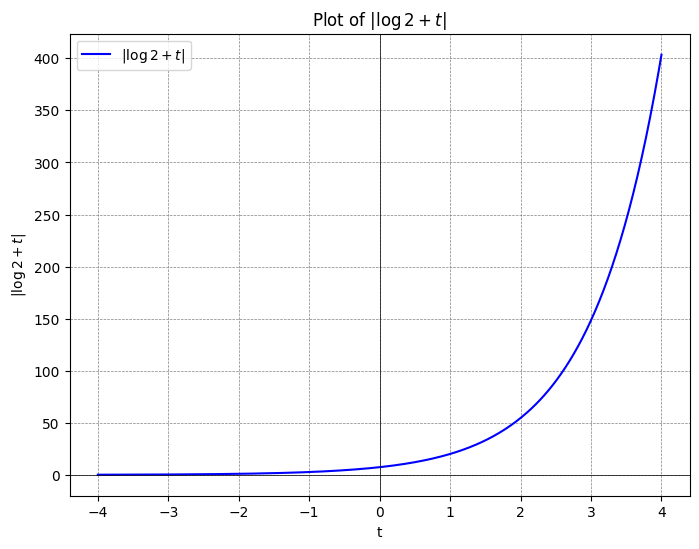

In [129]:
# here we have it stretching out from the matrix [[2]]
# this is still a great function with a special type of symmetry
# the "log" singular value function is going to be very hard to make convex
# can we use concave?
import numpy as np
import matplotlib.pyplot as plt

# Define the function g(t) = |log|2 + t||
def g(t):
    return np.exp((2 + t))

# Generate a range of t values
t_values = np.linspace(-4, 4, 400)
g_values = g(t_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(t_values, g_values, label=r'$|\log2 + t|$', color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title(r'Plot of $|\log2 + t|$')
plt.xlabel('t')
plt.ylabel(r'$|\log 2 + t|$')
plt.legend()
plt.show()


/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_77170/135466069.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  return np.max([t, 1/t])


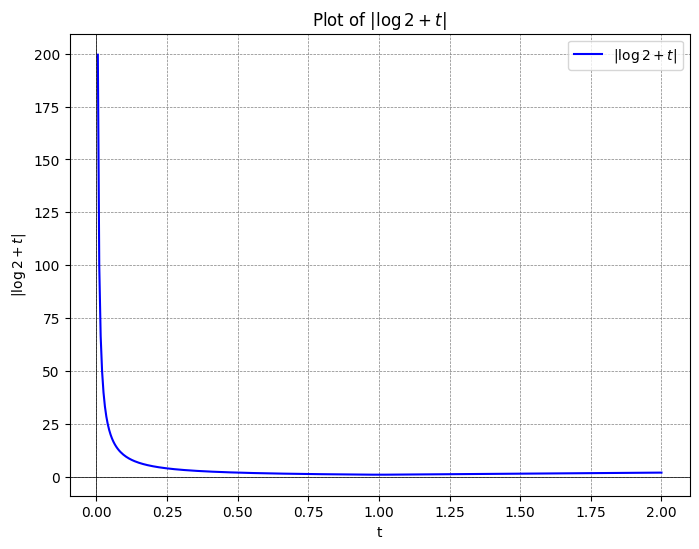

In [134]:
# here we have it stretching out from the matrix [[2]]
# this is still a great function with a special type of symmetry
# the "log" singular value function is going to be very hard to make convex
# can we use concave?
import numpy as np
import matplotlib.pyplot as plt

# Define the function g(t) = |log|2 + t||
def g(t):
    return np.max([t, 1/t])

# Generate a range of t values
t_values = np.linspace(0, 2, 400)
g_values = [g(t) for t in t_values]

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(t_values, g_values, label=r'$|\log2 + t|$', color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title(r'Plot of $|\log2 + t|$')
plt.xlabel('t')
plt.ylabel(r'$|\log 2 + t|$')
plt.legend()
plt.show()


/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_77170/1730093729.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  return np.log(np.exp(t) + np.exp(1/t))


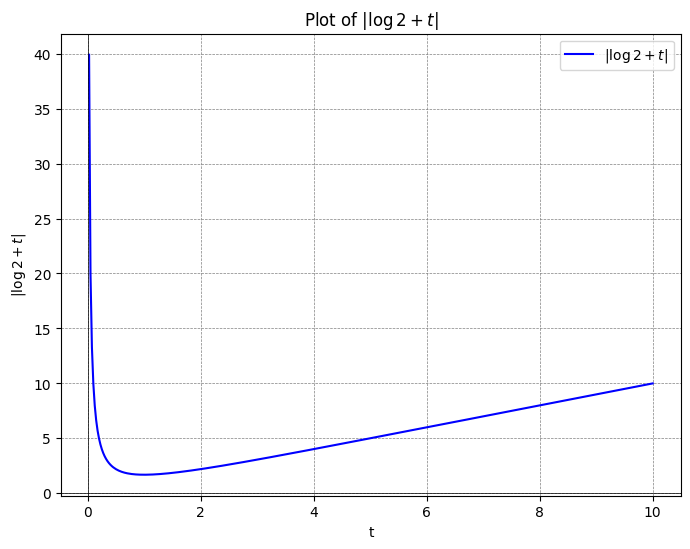

In [137]:
# here we have it stretching out from the matrix [[2]]
# this is still a great function with a special type of symmetry
# the "log" singular value function is going to be very hard to make convex
# can we use concave?
import numpy as np
import matplotlib.pyplot as plt

# Define the function g(t) = |log|2 + t||
def g(t):
    return np.log(np.exp(t) + np.exp(1/t))

# Generate a range of t values
t_values = np.linspace(0, 10, 400)
g_values = [g(t) for t in t_values]

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(t_values, g_values, label=r'$|\log2 + t|$', color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title(r'Plot of $|\log2 + t|$')
plt.xlabel('t')
plt.ylabel(r'$|\log 2 + t|$')
plt.legend()
plt.show()


In [140]:
import cvxpy as cp


ModuleNotFoundError: No module named 'cvxpy'

/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_77170/3654463124.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  return np.max([t**2,(1/t)**2])


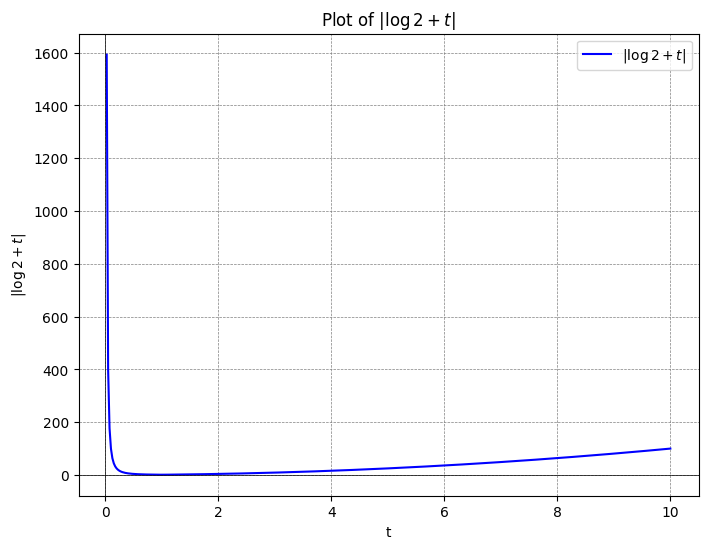

In [138]:
# here we have it stretching out from the matrix [[2]]
# this is still a great function with a special type of symmetry
# the "log" singular value function is going to be very hard to make convex
# can we use concave?
import numpy as np
import matplotlib.pyplot as plt

# Define the function g(t) = |log|2 + t||
def g(t):
    return np.max([t**2,(1/t)**2])

# Generate a range of t values
t_values = np.linspace(0, 10, 400)
g_values = [g(t) for t in t_values]

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(t_values, g_values, label=r'$|\log2 + t|$', color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title(r'Plot of $|\log2 + t|$')
plt.xlabel('t')
plt.ylabel(r'$|\log 2 + t|$')
plt.legend()
plt.show()


In [ ]:
log(e 
x
 +e 
1/x
 )

/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_77170/1329152994.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


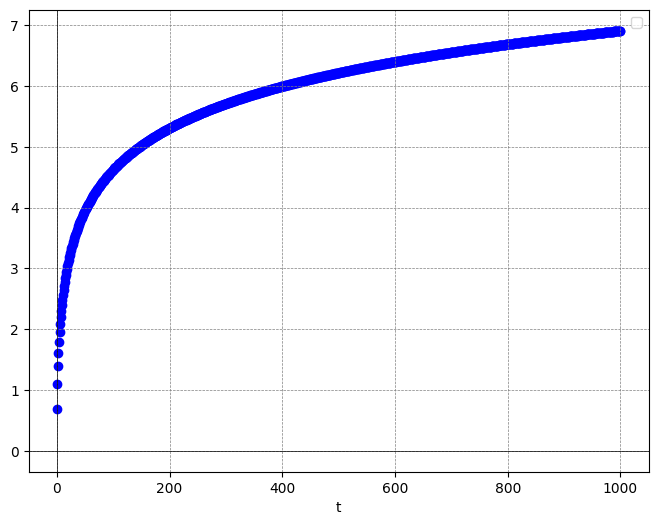

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function g(t) = |log|2 + t||
def g(t):
    return np.log(2 + t)

# Generate a range of t values
t_values = np.linspace(0, 1000, 1000)
g_values = g(t_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.scatter(t_values, g_values,  color='blue')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('t')
plt.legend()
plt.show()


In [121]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Define the function using the log-sum-exp trick
# def log_sum_exp(a, b):
#     max_val = np.maximum(a, b)
#     return max_val + np.log(np.exp(a - max_val) + np.exp(b - max_val))

# # Define the function f(t) = sqrt((log |2+t|)^2 + (log |2-t|)^2)
# def f(t):
#     log_abs_2_plus_t = np.log(np.abs(2 + t))
#     log_abs_2_minus_t = np.log(np.abs(2 - t))
#     # Using the log-sum-exp trick for the squared terms
#     log_sum_exp_val = log_sum_exp(2 * log_abs_2_plus_t, 2 * log_abs_2_minus_t)
#     return np.sqrt(np.exp(log_sum_exp_val))

# # Generate a range of t values
# t_values = np.linspace(-4, 4, 400)
# f_values = f(t_values)

# # Plot the function
# plt.figure(figsize=(8, 6))
# plt.plot(t_values, f_values, label=r'$\sqrt{(\log |2+t|)^2 + (\log |2-t|)^2}$', color='blue')
# plt.axhline(0, color='black', linewidth=0.5)
# plt.axvline(0, color='black', linewidth=0.5)
# plt.grid(color='gray', linestyle='--', linewidth=0.5)
# plt.title(r'Plot of $\sqrt{(\log |2+t|)^2 + (\log |2-t|)^2}$')
# plt.xlabel('t')
# plt.ylabel(r'$\sqrt{(\log |2+t|)^2 + (\log |2-t|)^2}$')
# plt.legend()
# plt.show()


/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_77170/3817131516.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


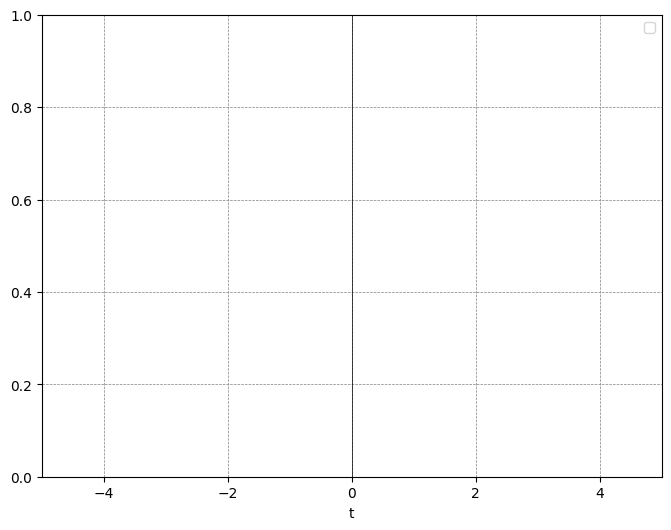

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function g(t) = |log|2 + t||
def g(t):
    return np.abs(2 + t)

# Generate a range of t values
t_values = np.linspace(-4, 4, 400)
g_values = g(t_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-5,5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('t')
plt.legend()
plt.show()


[-4.         -3.97994987 -3.95989975 -3.93984962 -3.9197995  -3.89974937
 -3.87969925 -3.85964912 -3.839599   -3.81954887 -3.79949875 -3.77944862
 -3.7593985  -3.73934837 -3.71929825 -3.69924812 -3.67919799 -3.65914787
 -3.63909774 -3.61904762 -3.59899749 -3.57894737 -3.55889724 -3.53884712
 -3.51879699 -3.49874687 -3.47869674 -3.45864662 -3.43859649 -3.41854637
 -3.39849624 -3.37844612 -3.35839599 -3.33834586 -3.31829574 -3.29824561
 -3.27819549 -3.25814536 -3.23809524 -3.21804511 -3.19799499 -3.17794486
 -3.15789474 -3.13784461 -3.11779449 -3.09774436 -3.07769424 -3.05764411
 -3.03759398 -3.01754386 -2.99749373 -2.97744361 -2.95739348 -2.93734336
 -2.91729323 -2.89724311 -2.87719298 -2.85714286 -2.83709273 -2.81704261
 -2.79699248 -2.77694236 -2.75689223 -2.73684211 -2.71679198 -2.69674185
 -2.67669173 -2.6566416  -2.63659148 -2.61654135 -2.59649123 -2.5764411
 -2.55639098 -2.53634085 -2.51629073 -2.4962406  -2.47619048 -2.45614035
 -2.43609023 -2.4160401  -2.39598997 -2.37593985 -2.

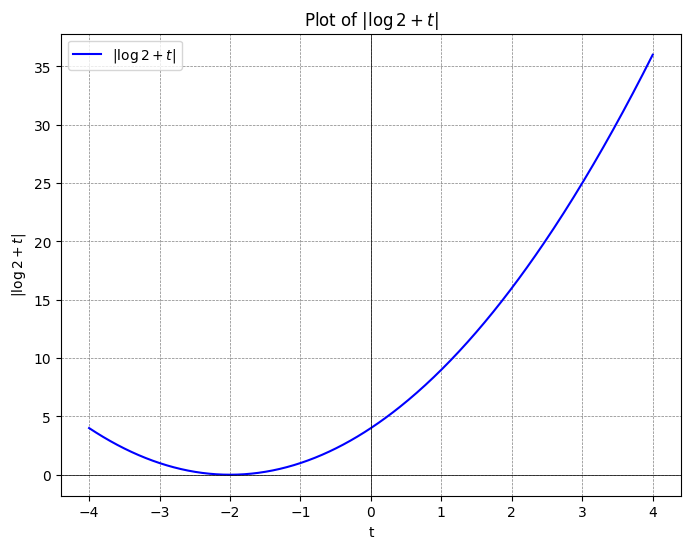

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function g(t) = |log|2 + t||
def g(t):
    print(t)
    return (2+t)**2

# Generate a range of t values
t_values = np.linspace(-4, 4, 400)
g_values = g(t_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(t_values, g_values, label=r'$|\log2 + t|$', color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title(r'Plot of $|\log2 + t|$')
plt.xlabel('t')
plt.ylabel(r'$|\log 2 + t|$')
plt.legend()
plt.show()


/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_77170/2367830347.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(2 + t)


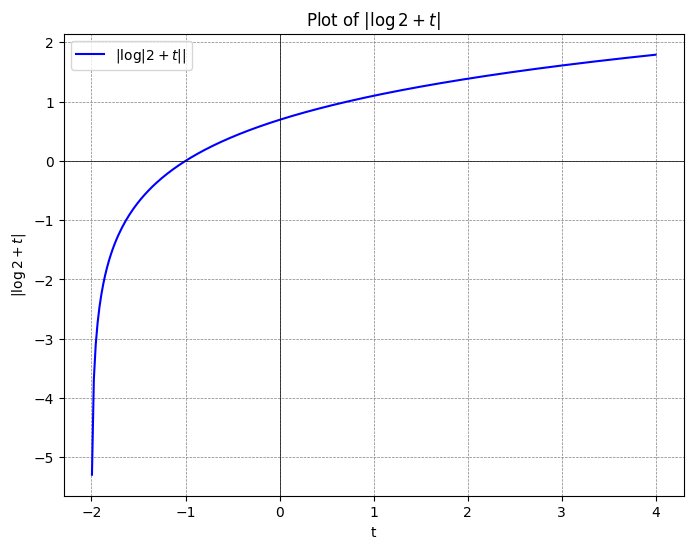

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function g(t) = |log|2 + t||
def g(t):
    return np.log(2 + t)

# Generate a range of t values
t_values = np.linspace(-4, 4, 400)
g_values = g(t_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(t_values, g_values, label=r'$|\log|2 + t||$', color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title(r'Plot of $|\log2 + t|$')
plt.xlabel('t')
plt.ylabel(r'$|\log 2 + t|$')
plt.legend()
plt.show()


In [120]:
# import numpy as np

# # Log-sum-exp trick function for two values
# def log_sum_exp(a, b):
#     max_val = np.maximum(a, b)
#     return max_val + np.log(np.exp(a - max_val) + np.exp(b - max_val))

# # Define the function using the log-sum-exp trick for the 1D case
# def f(t):
#     log_abs_2_plus_t = np.log(np.abs(2 + t))
#     log_abs_2_minus_t = np.log(np.abs(2 - t))
#     # Compute the squared terms
#     log_sum_exp_val = log_sum_exp(2 * log_abs_2_plus_t, 2 * log_abs_2_minus_t)
#     return np.sqrt(np.exp(log_sum_exp_val))

# # Generate a range of t values
# t_values = np.linspace(-4, 4, 400)
# f_values = f(t_values)

# # Print some sample values
# for t, value in zip(t_values[:10], f_values[:10]):
#     print(f"t = {t}, f(t) = {value}")

# # Plot the function
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 6))
# plt.plot(t_values, f_values, label=r'$\sqrt{(\log |2+t|)^2 + (\log |2-t|)^2}$', color='blue')
# plt.axhline(0, color='black', linewidth=0.5)
# plt.axvline(0, color='black', linewidth=0.5)
# plt.grid(color='gray', linestyle='--', linewidth=0.5)
# plt.title(r'Plot of $\sqrt{(\log |2+t|)^2 + (\log |2-t|)^2}$')
# plt.xlabel('t')
# plt.ylabel(r'$\sqrt{(\log |2+t|)^2 + (\log |2-t|)^2}$')
# plt.legend()
# plt.show()
